In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.spatial.distance import correlation
from sympy.core.multidimensional import structure_copy
from ydata_profiling import ProfileReport
from ydata_profiling.visualisation.plot import correlation_matrix

# Set color palette
sns.set_palette("Set2")

#ignore warning
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('data/GlobalWeatherRepository_470.csv')
data.head()


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [2]:
# Summary Statistics
data.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,47357.000000,47357.00000,4.735700e+04,47357.000000,47357.000000,47357.000000,47357.000000,47357.000000,47357.000000,47357.000000,...,47357.000000,47357.000000,47357.000000,47357.000000,47357.000000,47357.000000,47357.000000,47357.000000,47357.000000,47357.000000
mean,19.142865,22.20901,1.726400e+09,23.217757,73.793372,8.300815,13.362859,171.297760,1013.646473,29.932374,...,19.331292,512.513956,62.802439,13.755565,10.369967,23.105936,45.434687,1.635154,2.470765,49.061702
std,24.481988,65.78442,6.137668e+06,9.035403,16.263689,9.977855,16.056654,103.093767,7.019432,0.207177,...,17.726865,997.436573,37.986115,25.508921,52.261018,45.750377,137.628029,0.951060,2.436476,35.072143
min,-41.300000,-175.20000,1.715849e+09,-24.800000,-12.600000,2.200000,3.600000,1.000000,971.000000,28.670000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.185000,0.185000,1.000000,1.000000,0.000000
25%,3.750000,-6.25000,1.721048e+09,18.400000,65.100000,4.000000,6.500000,83.000000,1010.000000,29.830000,...,10.800000,217.000000,37.000000,0.800000,0.700000,4.600000,7.500000,1.000000,1.000000,14.000000
50%,17.250000,23.32000,1.726484e+09,25.400000,77.700000,6.900000,11.200000,164.000000,1013.000000,29.910000,...,17.000000,308.950000,59.000000,2.900000,2.035000,11.655000,18.315000,1.000000,1.000000,49.000000
75%,40.400000,50.58000,1.731747e+09,29.000000,84.200000,11.600000,18.700000,259.000000,1017.000000,30.030000,...,25.800000,469.900000,83.700000,13.700000,7.600000,25.715000,41.440000,2.000000,3.000000,83.000000
max,64.150000,179.22000,1.736941e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,1080.000000,31.890000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,5858.020000,6.000000,10.000000,100.000000


In [3]:
# dataset structure
print(f'Dataset info: {data.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47357 entries, 0 to 47356
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       47357 non-null  object 
 1   location_name                 47357 non-null  object 
 2   latitude                      47357 non-null  float64
 3   longitude                     47357 non-null  float64
 4   timezone                      47357 non-null  object 
 5   last_updated_epoch            47357 non-null  int64  
 6   last_updated                  47357 non-null  object 
 7   temperature_celsius           47357 non-null  float64
 8   temperature_fahrenheit        47357 non-null  float64
 9   condition_text                47357 non-null  object 
 10  wind_mph                      47357 non-null  float64
 11  wind_kph                      47357 non-null  float64
 12  wind_degree                   47357 non-null  int64  
 13  w

In [4]:
# Check the number of numeric and categorical columns count
numeric_columns_count = data.select_dtypes(include='number').shape[1]

# Count categorical columns
categorical_columns_count =data.select_dtypes(include='object').shape[1]

# Display the counts
print(f'Number of numeric columns: {numeric_columns_count}')
print(f'Number of categorical columns: {categorical_columns_count}')

# Check the shape of the datase
print(f'shape of the Dataset is {data.shape}')


Number of numeric columns: 30
Number of categorical columns: 11
shape of the Dataset is (47357, 41)


# Step 1 Data Cleaning and Preprocessing

In [5]:
# Check for NaN values in the Dataset
missing_value = data.isnull().sum()
print(f'Missing values: {missing_value}')

missing_values = data.isnull().sum().sum()



# Check if there are any missing values and print the result using an f-string
if missing_values > 0:
    print(f"Missing values are present. Total missing values: {missing_values}")
else:
    print("No missing values in the dataset.")

Missing values: country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               

In [6]:
# Check the Duplicates
duplicates_count = data.duplicated().sum()

# Check if there are any duplicate rows and print the result using f-strings
if data.duplicated().any():
    print(f"Duplicate entries found. Total duplicate rows: {duplicates_count}")
else:
    print("No duplicate entries in the dataset.")

No duplicate entries in the dataset.


In [7]:
# Standardize Country Names and Displaying Unique values

# Check Unique Country Names
unique_countries = data['country'].unique()
numOfUniqueCountries = data['country'].nunique()
print(f'Number of Uniquer countries', numOfUniqueCountries)
print(unique_countries)


Number of Uniquer countries 210
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Madagascar' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Comoros' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Swaziland' 'Ethiopia' 'Fiji Islands' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Vatican City'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' '

In [8]:
# Strip leading/trailing spaces and capitalize correctly
data['country'] = data['country'].str.strip().str.title()

country_mapping = {
    'USA United States of America': 'United States of America',
    "Lao People's Democratic Republic": 'Laos',
    'Malásia': 'Malaysia',
    'Komoren': 'Comoros',
    'كولومبيا': 'Colombia',
    'Estonie': 'Estonia',
    'Гватемала': 'Guatemala',
    'Inde': 'India',
    'Letonia': 'Latvia',
    'Польша': 'Poland',
    'Mexique': 'Mexico',
    'Polônia': 'Poland',
    'Marrocos': 'Morocco',
    'Турция': 'Turkey',
    'Saint-Vincent-et-les-Grenadines': 'Saint Vincent and the Grenadines',
    'Saudi Arabien': 'Saudi Arabia',
    'Südkorea': 'South Korea',
    'Bélgica': 'Belgium',
    'Turkménistan': 'Turkmenistan',
    '火鸡': 'Turkey',
    'Jemen': 'Yemen'
}

# Apply the mapping
data['country'] = data['country'].replace(country_mapping)


In [9]:
# Check Unique Country Names
unique_countries = data['country'].unique()
numOfUniqueCountries = data['country'].nunique()
print(f'Number of Uniquer countries', numOfUniqueCountries)
print(unique_countries)


Number of Uniquer countries 192
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua And Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia And Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Madagascar' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Comoros' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Democratic Republic Of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Swaziland' 'Ethiopia' 'Fiji Islands' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Vatican City'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' '

# Step 2 Exploratory Data Analysis (EDA)
See exploratory_data_analysis.ipynb for detailed analysis


Advanced EDA?

# Building a basic forecasting models
The model predict temperature for specific citiy

1. **Data Preparation**

In [10]:
import os

# Path to the folder containig all the CSV files
data_folder = 'data'

# List all the files in the folder
files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith('.csv')]

# Load and concatenate allCSV files
data = pd.concat([pd.read_csv(file) for file in files],ignore_index=True )

# data = pd.read_csv('data/GlobalWeatherRepository_470.csv')

data.head()


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [11]:
# Strip leading/trailing spaces and capitalize correctly
data['country'] = data['country'].str.strip().str.title()

country_mapping = {
    "Lao People's Democratic Republic": 'Laos',
    'Malásia': 'Malaysia',
    'Komoren': 'Comoros',
    'كولومبيا': 'Colombia',
    'Estonie': 'Estonia',
    'Гватемала': 'Guatemala',
    'Inde': 'India',
    'Letonia': 'Latvia',
    'Польша': 'Poland',
    'Mexique': 'Mexico',
    'Polônia': 'Poland',
    'Marrocos': 'Morocco',
    'Турция': 'Turkey',
    'Saint-Vincent-et-les-Grenadines': 'Saint Vincent and the Grenadines',
    'Saudi Arabien': 'Saudi Arabia',
    'Südkorea': 'South Korea',
    'Bélgica': 'Belgium',
    'Turkménistan': 'Turkmenistan',
    '火鸡': 'Turkey',
    'Jemen': 'Yemen'
}

# Apply the mapping
data['country'] = data['country'].replace(country_mapping)

# unique_countries = data['country'].unique()
# print(unique_countries)



In [12]:
# Extract one country data
country_name = 'United States Of America'
country_data = data[data['country'] == country_name]
print("Extract rows:", len(country_data))
print(country_data.columns)


Extract rows: 962
Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')


**Extract necessary features to predict temperature_celsius**:

The features are chosen based on the correlation value in the Step 2 EDA phase.


In [13]:
# Strip leading/trailing spaces and capitalize correctly
data['country'] = data['country'].str.strip().str.title()

selected_columns = [
    'temperature_celsius',  # Target variable
    'feels_like_celsius',
    'uv_index',
    'humidity',
    'pressure_mb',
    'cloud',
    'air_quality_Ozone',
    'air_quality_Nitrogen_dioxide',
    'latitude',
    'last_updated'
]


country_data = country_data[selected_columns]
country_data['last_updated'] = pd.to_datetime(country_data['last_updated'])

country_data.describe()

,temperature_celsius,feels_like_celsius,uv_index,humidity,pressure_mb,cloud,air_quality_Ozone,air_quality_Nitrogen_dioxide,latitude,last_updated
count,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962
mean,9.248545,8.534407,1.143451,90.584200,1016.863825,49.435551,55.041996,6.928524,47.950550,2024-09-15 13:25:43.659043328
min,0.800000,-1.100000,0.000000,31.000000,989.000000,0.000000,19.100000,0.700000,40.710000,2024-05-16 01:45:00
25%,6.700000,5.500000,0.000000,88.000000,1013.000000,0.000000,43.600000,2.960000,48.079200,2024-07-15 06:00:00
50%,9.500000,8.900000,1.000000,94.000000,1017.000000,50.000000,56.500000,5.180000,48.079200,2024-09-16 04:15:00
75%,11.300000,11.200000,1.000000,99.000000,1021.000000,100.000000,66.000000,9.435000,48.080000,2024-11-17 00:45:00
max,26.100000,26.100000,7.000000,100.000000,1037.000000,100.000000,114.000000,65.490000,48.080000,2025-01-18 03:15:00
std,3.080583,3.714926,1.351071,11.551076,7.367643,45.743215,15.883967,6.362394,0.595974,NaN


2. **Feature Engineering**

In [14]:
# Time-Based Features
country_data['hour'] = country_data['last_updated'].dt.hour
country_data['day_of_week'] = country_data['last_updated'].dt.dayofweek
country_data['month'] = country_data['last_updated'].dt.month

# Lag Features
country_data['temp_lag_1'] = country_data['temperature_celsius'].shift(1)
country_data['temp_lag_2'] = country_data['temperature_celsius'].shift(2)

# Rolling Statistics
country_data['rolling_mean_3'] = country_data['temperature_celsius'].rolling(window=3).mean()
country_data['rolling_std_3'] = country_data['temperature_celsius'].rolling(window=3).std()

# Interaction Features
country_data['uv_cloud_index'] = country_data['uv_index'] * country_data['cloud']

# Derived Features
country_data['air_quality_index'] = (country_data['air_quality_Ozone'] + country_data['air_quality_Nitrogen_dioxide']) / 2

# Handle Missing Values if any
country_data = country_data.dropna()

country_data.head()

,temperature_celsius,feels_like_celsius,uv_index,humidity,pressure_mb,cloud,air_quality_Ozone,air_quality_Nitrogen_dioxide,latitude,last_updated,hour,day_of_week,month,temp_lag_1,temp_lag_2,rolling_mean_3,rolling_std_3,uv_cloud_index,air_quality_index
574,13.3,13.0,4.0,31,1016.0,0,85.8,1.2,46.6,2024-05-17 09:15:00,9,4,5,15.6,16.1,15.000000,1.493318,0.0,43.50
767,8.9,7.8,3.0,63,1016.0,100,50.1,3.0,46.6,2024-05-18 07:30:00,7,5,5,13.3,15.6,12.600000,3.404409,300.0,26.55
962,7.8,7.0,3.0,63,1019.0,0,64.4,2.7,46.6,2024-05-19 07:15:00,7,6,5,8.9,13.3,10.000000,2.910326,0.0,33.55
1157,9.4,8.9,3.0,59,1021.0,0,57.9,3.5,46.6,2024-05-20 07:45:00,7,0,5,7.8,8.9,8.700000,0.818535,0.0,30.70
1352,11.1,11.0,4.0,54,1017.0,50,50.1,3.5,46.6,2024-05-21 07:45:00,7,1,5,9.4,7.8,9.433333,1.650253,200.0,26.80


3. **Outlier Removal**

Visualize outliers with a box plot.


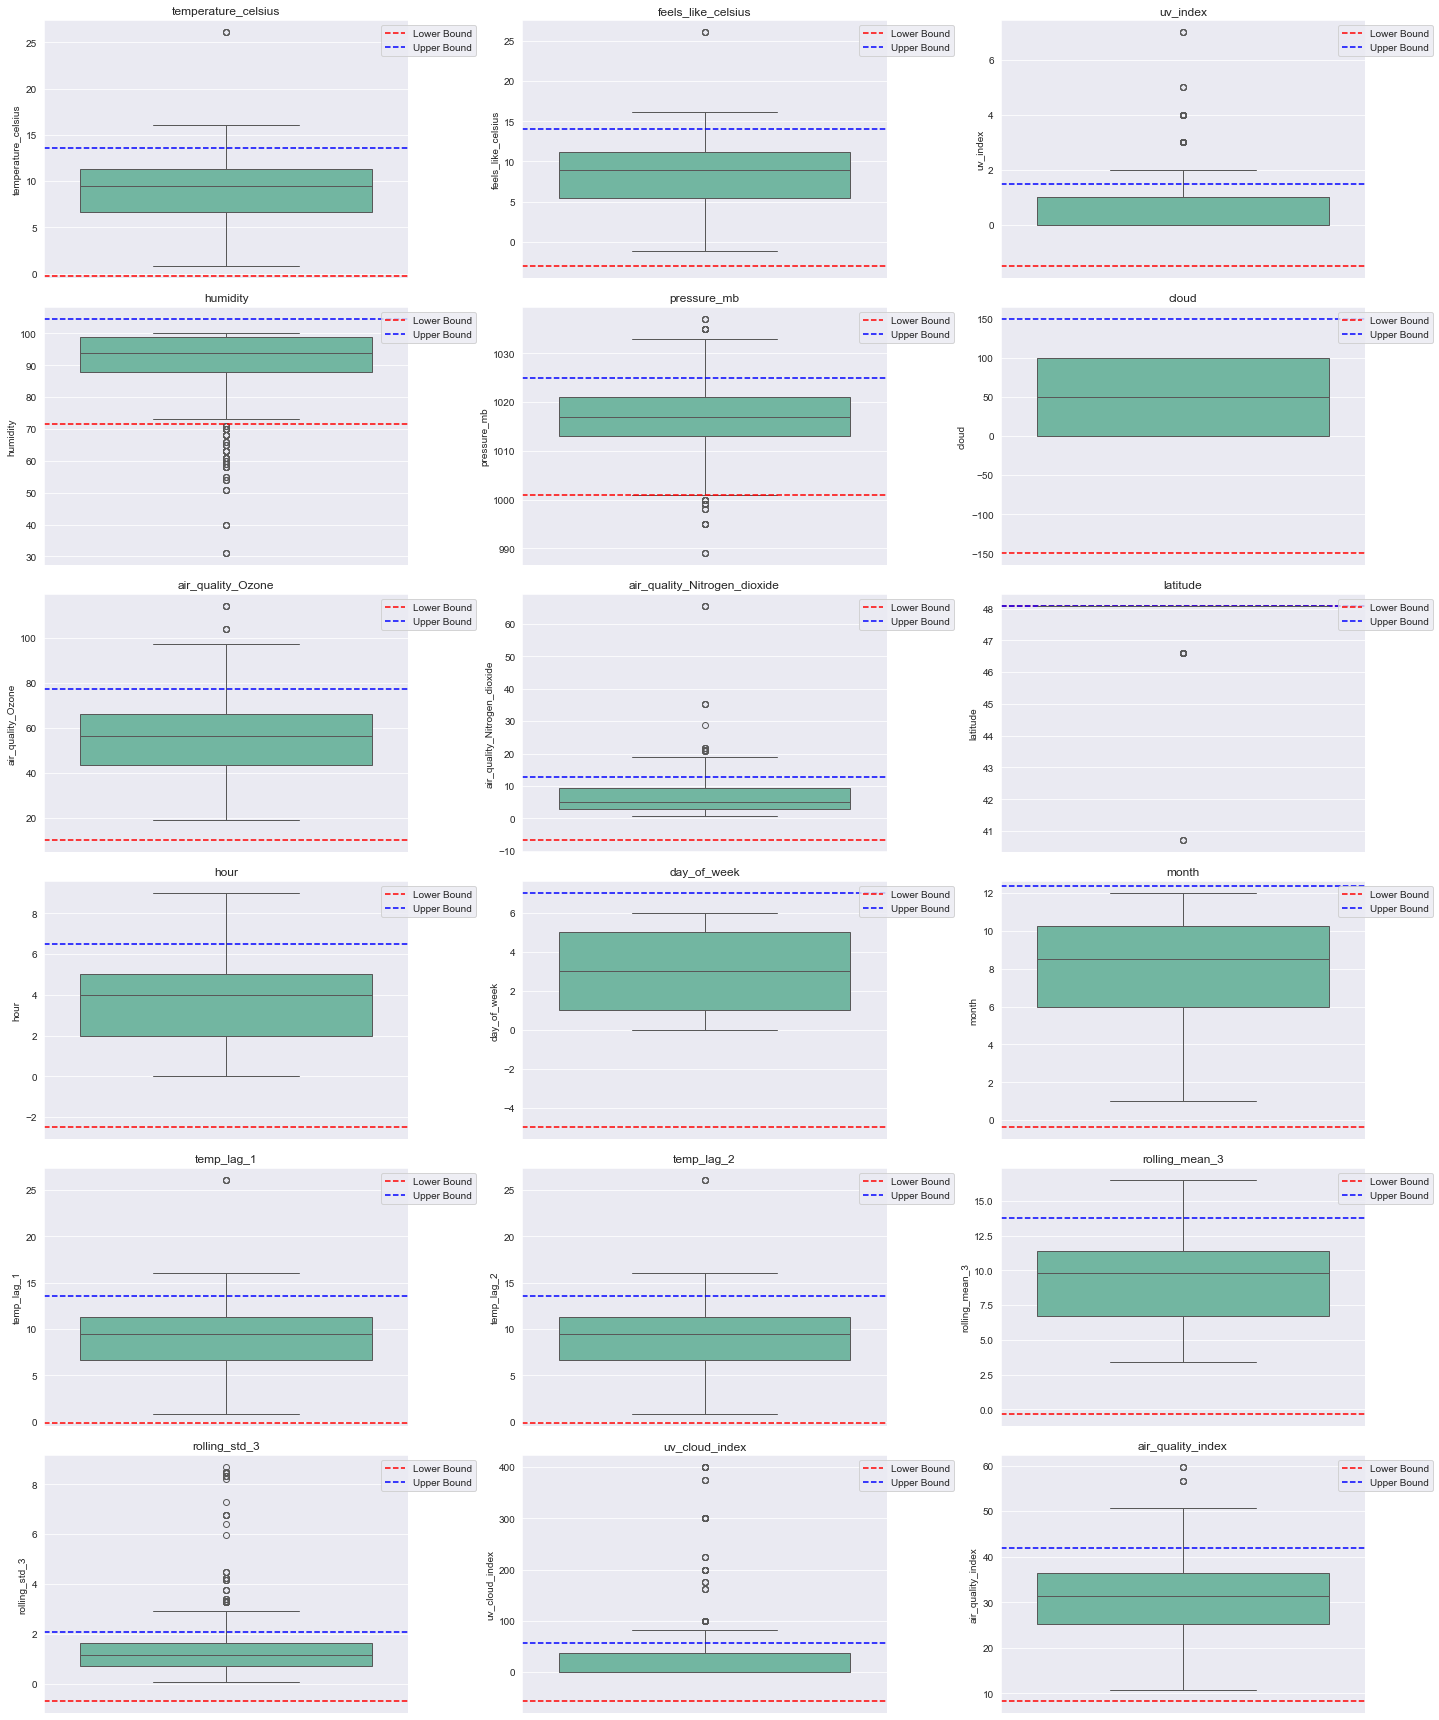

In [15]:

# Select numeric columns
numeric_columns = country_data.select_dtypes(include=['number']).columns

# Set up the matplotlib figure
num_cols = 3 # Number of plots per row
num_rows = (len(numeric_columns) + num_cols -1) // num_cols # Calculate rows needed

# Adjust figure size based on rows
plt.figure(figsize=(20, num_rows * 4))

# Create boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    Q1 = country_data[column].quantile(0.25)
    Q3 = country_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q1 + 1.5 * IQR

    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=country_data[column], palette='Set2')

    # Add lines for lower and upper bounds
    plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axhline(y=upper_bound, color='blue', linestyle='--', label='Upper Bound')

    plt.title(column)
    plt.xlabel('')
    # Position the legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()


Cap Outliers with lower bound or higher bound instead of dropping them.


In [ ]:

#  Iterate over al numeric columns to cap outliers
for column in numeric_columns:
    Q1 = country_data[column].quantile(0.25)
    Q3 = country_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    country_data[column] = country_data[column].clip(lower=lower_bound, upper=upper_bound)

# Replot the box plots after capping
plt.figure(figsize=(20, num_rows * 4))

for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=country_data[column], palette='Set2')
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

Refine and polish training data set:

1. **Delete duplicated rows.**
2. **Sort oldest to newest for Time Series Training.**

In [17]:
# Sort the data by 'last_updated' in ascending order
country_data = country_data.sort_values(by='last_updated', ascending=True)

# Remove rows with duplicated 'last_updated' values, keeping only the first occurrence
country_data = country_data.drop_duplicates(subset='last_updated', keep='first')

# Reset the index after sorting and removing duplicates
country_data = country_data.reset_index(drop=True)

# Verify the result
print(country_data['last_updated'].head())  # Check the first few timestamps
print(country_data['last_updated'].tail())  # Check the last few timestamps


0   2024-05-16 01:45:00
1   2024-05-16 07:15:00
2   2024-05-17 09:15:00
3   2024-05-18 07:30:00
4   2024-05-19 07:15:00
Name: last_updated, dtype: datetime64[ns]
237   2025-01-14 03:00:00
238   2025-01-15 02:15:00
239   2025-01-16 02:15:00
240   2025-01-17 02:15:00
241   2025-01-18 03:15:00
Name: last_updated, dtype: datetime64[ns]


5. **Train the Model for celcius**
Only LightGBM

In [18]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from lightgbm import early_stopping, log_evaluation

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Split Data for testing and Validation
tscv = TimeSeriesSplit(n_splits=5)

mae_list, rmse_list, mape_list = [], [], []

for train_index, test_index in tscv.split(country_data):
    train_data, test_data = country_data.iloc[train_index], country_data.iloc[test_index]
    X_train, y_train = train_data.drop(columns=['temperature_celsius','last_updated']), train_data['temperature_celsius']
    X_test, y_test = test_data.drop(columns=['temperature_celsius','last_updated']), test_data['temperature_celsius']

    model = lgb.LGBMRegressor(
        objective='regression',
        metric='rmse',
        learning_rate=0.01,
        num_leaves=50,  # Reduce complexity
        n_estimators=1000,
        min_child_samples=20,  # Regularization
        lambda_l1=1.0,  # L1 regularization
        lambda_l2=1.0,  # L2 regularization
        random_state=42,
        verbosity=-1 # Suppress warnings
    )
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_test, y_test)],
        eval_metric = "rmse",
        callbacks=[
            early_stopping(
                stopping_rounds=10,
                verbose=False
            ),
            log_evaluation(period=10)
        ]
    )
    lgb_prediction = model.predict(X_test)

    mae_list.append(mean_absolute_error(y_test, lgb_prediction))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, lgb_prediction)))
    mape_list.append(mean_absolute_percentage_error(y_test, lgb_prediction))

# Print average metrics
print(f"Average MAE: {np.mean(mae_list):.4f}")
print(f"Average RMSE: {np.mean(rmse_list):.4f}")
print(f"Average MAPE: {np.mean(mape_list):.2f}%")


[10]	valid_0's rmse: 1.64591
[20]	valid_0's rmse: 1.54833
[30]	valid_0's rmse: 1.4659
[40]	valid_0's rmse: 1.39706
[50]	valid_0's rmse: 1.36142
[60]	valid_0's rmse: 1.33671
[70]	valid_0's rmse: 1.3165
[80]	valid_0's rmse: 1.30031
[90]	valid_0's rmse: 1.28767
[100]	valid_0's rmse: 1.27812
[110]	valid_0's rmse: 1.27127
[120]	valid_0's rmse: 1.26673
[130]	valid_0's rmse: 1.26416
[140]	valid_0's rmse: 1.26326
[150]	valid_0's rmse: 1.26376
[10]	valid_0's rmse: 1.46539
[20]	valid_0's rmse: 1.34484
[30]	valid_0's rmse: 1.24406
[40]	valid_0's rmse: 1.15718
[50]	valid_0's rmse: 1.08699
[60]	valid_0's rmse: 1.03016
[70]	valid_0's rmse: 0.984197
[80]	valid_0's rmse: 0.949511
[90]	valid_0's rmse: 0.923969
[100]	valid_0's rmse: 0.905192
[110]	valid_0's rmse: 0.8901
[120]	valid_0's rmse: 0.879032
[130]	valid_0's rmse: 0.872157
[140]	valid_0's rmse: 0.865327
[150]	valid_0's rmse: 0.86033
[160]	valid_0's rmse: 0.857341
[170]	valid_0's rmse: 0.855581
[10]	valid_0's rmse: 2.72758
[20]	valid_0's rmse: 2.

Only ARIMA

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Initialize metrics
tscv = TimeSeriesSplit(n_splits=5)
mae_list, rmse_list, mape_list = [], [], []

# Initialize list for storing predictions
arima_predictions = []

# Loop through TimeSeriesSplit
for train_index, test_index in tscv.split(country_data):
    print(f"Processing fold with train size: {len(train_index)}, test size: {len(test_index)}")

    # Train/Test Split
    train_data, test_data = country_data.iloc[train_index], country_data.iloc[test_index]
    y_train, y_test = train_data['temperature_celsius'], test_data['temperature_celsius']

    # Fit ARIMA model
    arima_model = ARIMA(y_train, order=(5, 1, 0))  # Adjust (p, d, q) based on data
    arima_model_fit = arima_model.fit()

    # Forecast for test set
    arima_preds = arima_model_fit.forecast(steps=len(y_test))
    print(f"ARIMA predictions: {len(arima_preds)}")
    arima_predictions.extend(arima_preds)

    # Evaluate the current fold
    mae = mean_absolute_error(y_test, arima_preds)
    rmse = np.sqrt(mean_squared_error(y_test, arima_preds))
    mape = mean_absolute_percentage_error(y_test, arima_preds)

    print(f"Fold MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%")

    mae_list.append(mae)
    rmse_list.append(rmse)
    mape_list.append(mape)

# Align y_true
y_true = country_data['temperature_celsius'].iloc[-len(arima_predictions):].values

# Ensure lengths match before calculating metrics
assert len(y_true) == len(arima_predictions), "Lengths of y_true and ARIMA predictions must match!"

# Evaluate ARIMA model
overall_mae = mean_absolute_error(y_true, arima_predictions)
overall_rmse = np.sqrt(mean_squared_error(y_true, arima_predictions))
overall_mape = mean_absolute_percentage_error(y_true, arima_predictions)

# Print final metrics
print(f"ARIMA Overall MAE: {overall_mae:.4f}")
print(f"ARIMA Overall RMSE: {overall_rmse:.4f}")
print(f"ARIMA Overall MAPE: {overall_mape:.2f}%")


Processing fold with train size: 22, test size: 11
ARIMA predictions: 11
Fold MAE: 1.2141, RMSE: 1.7955, MAPE: 15.52%
Processing fold with train size: 33, test size: 11
ARIMA predictions: 11
Fold MAE: 4.3995, RMSE: 4.9268, MAPE: 35.33%
Processing fold with train size: 44, test size: 11
ARIMA predictions: 11
Fold MAE: 1.8513, RMSE: 2.1092, MAPE: 16.81%
Processing fold with train size: 55, test size: 11
ARIMA predictions: 11
Fold MAE: 0.9974, RMSE: 1.2348, MAPE: 7.84%
Processing fold with train size: 66, test size: 11
ARIMA predictions: 11
Fold MAE: 2.6760, RMSE: 3.1356, MAPE: 30.17%
Processing fold with train size: 77, test size: 11
ARIMA predictions: 11
Fold MAE: 1.4378, RMSE: 1.7416, MAPE: 14.10%
Processing fold with train size: 88, test size: 11
ARIMA predictions: 11
Fold MAE: 1.1100, RMSE: 1.2321, MAPE: 9.82%
Processing fold with train size: 99, test size: 11
ARIMA predictions: 11
Fold MAE: 1.6854, RMSE: 1.8630, MAPE: 14.20%
Processing fold with train size: 110, test size: 11
ARIMA 

Only Prophet

In [20]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Initialize metrics
tscv = TimeSeriesSplit(n_splits=5)
mae_list, rmse_list, mape_list = [], [], []

# Prophet model setup and evaluation
for train_index, test_index in tscv.split(country_data):
    # Split into train and test
    train_data, test_data = country_data.iloc[train_index], country_data.iloc[test_index]

    # Prepare Prophet-compatible DataFrame
    train_df = train_data.rename(columns={'last_updated': 'ds', 'temperature_celsius': 'y'})[['ds', 'y']]
    test_df = test_data.rename(columns={'last_updated': 'ds', 'temperature_celsius': 'y'})[['ds', 'y']]

    # Initialize and fit Prophet model
    model = Prophet()
    model.fit(train_df)

    # Forecast
    future = test_df[['ds']]  # Prophet requires the 'ds' column for prediction
    forecast = model.predict(future)

    # Extract predictions
    prophet_prediction = forecast['yhat'].values
    y_true = test_df['y'].values

    # Calculate metrics
    mae_list.append(mean_absolute_error(y_true, prophet_prediction))
    rmse_list.append(np.sqrt(mean_squared_error(y_true, prophet_prediction)))
    mape_list.append(mean_absolute_percentage_error(y_true, prophet_prediction))

# Print average metrics
print(f"Average MAE: {np.mean(mae_list):.4f}")
print(f"Average RMSE: {np.mean(rmse_list):.4f}")
print(f"Average MAPE: {np.mean(mape_list):.2f}%")


13:47:57 - cmdstanpy - INFO - Chain [1] start processing
13:47:57 - cmdstanpy - INFO - Chain [1] done processing
13:47:57 - cmdstanpy - INFO - Chain [1] start processing
13:47:57 - cmdstanpy - INFO - Chain [1] done processing
13:47:57 - cmdstanpy - INFO - Chain [1] start processing
13:47:57 - cmdstanpy - INFO - Chain [1] done processing
13:47:57 - cmdstanpy - INFO - Chain [1] start processing
13:47:57 - cmdstanpy - INFO - Chain [1] done processing
13:47:57 - cmdstanpy - INFO - Chain [1] start processing
13:47:57 - cmdstanpy - INFO - Chain [1] done processing


Average MAE: 2.7852
Average RMSE: 3.3508
Average MAPE: 40.02%


6. **Benchmark with Metrics**

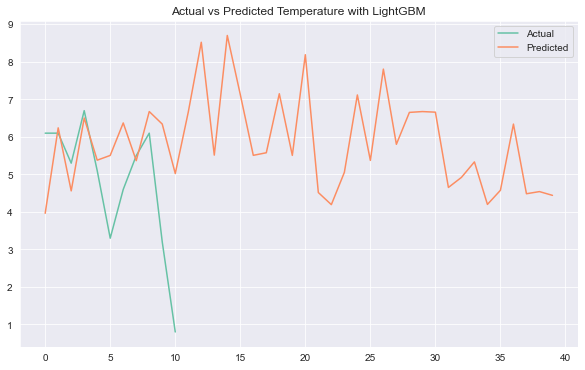

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')


plt.plot(lgb_prediction, label='Predicted') # LightGBM

plt.legend()
plt.title('Actual vs Predicted Temperature with LightGBM')
plt.show()

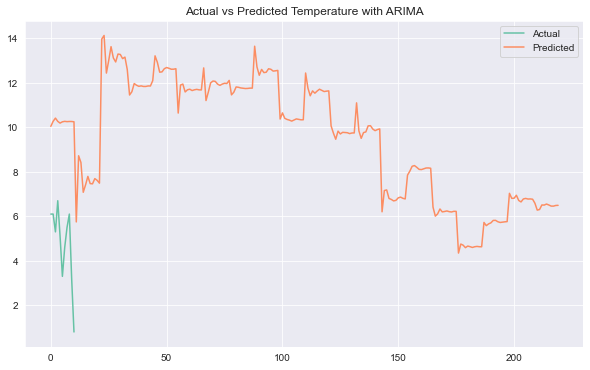

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')

plt.plot(arima_predictions, label='Predicted') # ARIMA

plt.legend()
plt.title('Actual vs Predicted Temperature with ARIMA')
plt.show()

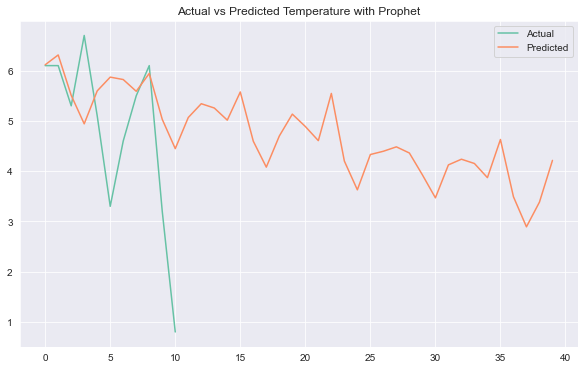

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')

plt.plot(prophet_prediction, label='Predicted') # Prohet

plt.legend()
plt.title('Actual vs Predicted Temperature with Prophet')
plt.show()

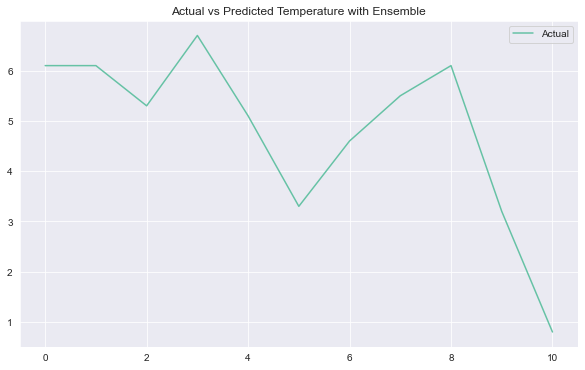

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')

# plt.plot(prophet_prediction, label='Predicted') # Ensemble

plt.legend()
plt.title('Actual vs Predicted Temperature with Ensemble')
plt.show()